# Machine Learning Model to predict churning (Exit) of Bank's Customer


"""
About Dataset
Description:
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.
Features:
RowNumber: The sequential number assigned to each row in the dataset.
CustomerId: A unique identifier for each customer.
Surname: The surname of the customer.
CreditScore: The credit score of the customer.
Geography: The geographical location of the customer (e.g., country or region).
Gender: The gender of the customer.
Age: The age of the customer.
Tenure: The number of years the customer has been with the bank.
Balance: The account balance of the customer.
NumOfProducts: The number of bank products the customer has.
HasCrCard: Indicates whether the customer has a credit card (binary: yes/no).
IsActiveMember: Indicates whether the customer is an active member (binary: yes/no).
EstimatedSalary: The estimated salary of the customer.
Exited: Indicates whether the customer has exited the bank (binary: yes/no).

"""


## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")


## Read the Dataset

In [2]:
cust_data = pd.read_csv("Churn_Modelling.csv")
cust_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Drop the unnecessory column
cust_data.drop(["RowNumber","CustomerId","Surname"], axis=1 , inplace = True)

In [4]:
cust_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
cust_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [7]:
cust_data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
cust_data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
# check for missing values
cust_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# replace categorical values in column Geography and Gender to numerical values
cust_data["Geography"].replace({"France":0,"Germany":1,"Spain":2}, inplace=True)
cust_data["Gender"].replace({"Male":0,"Female":1}, inplace=True)


In [11]:
cust_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


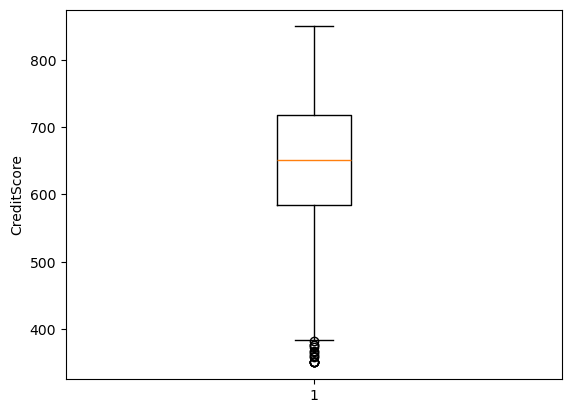

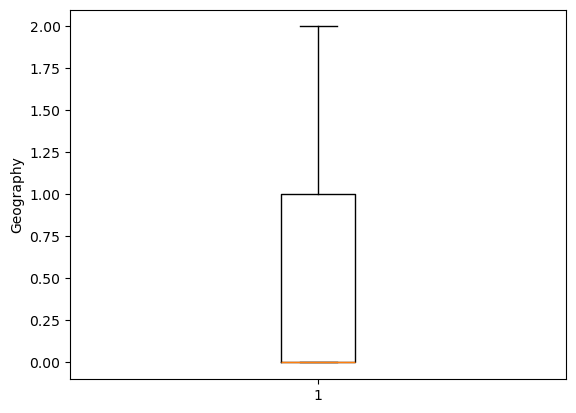

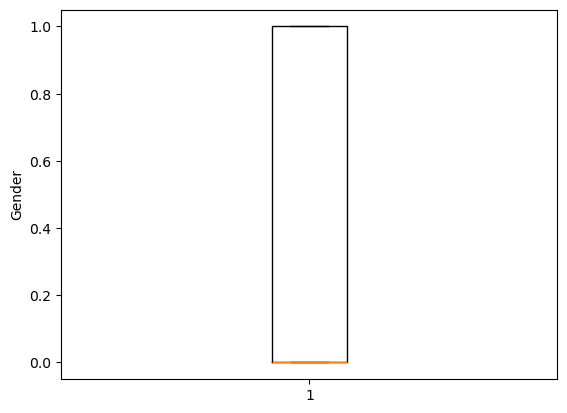

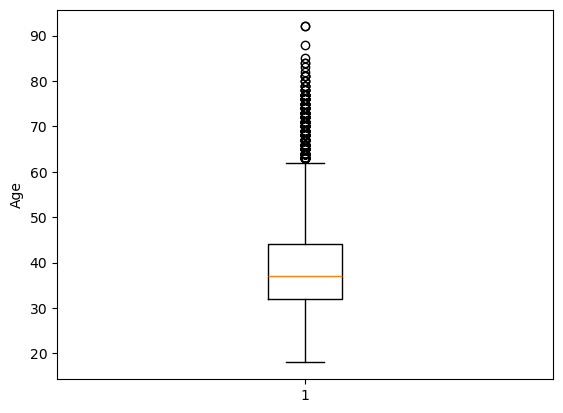

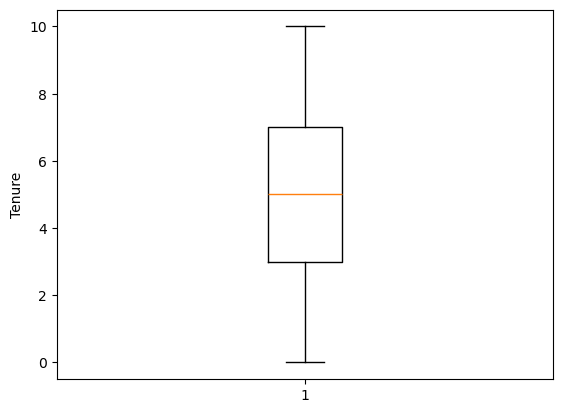

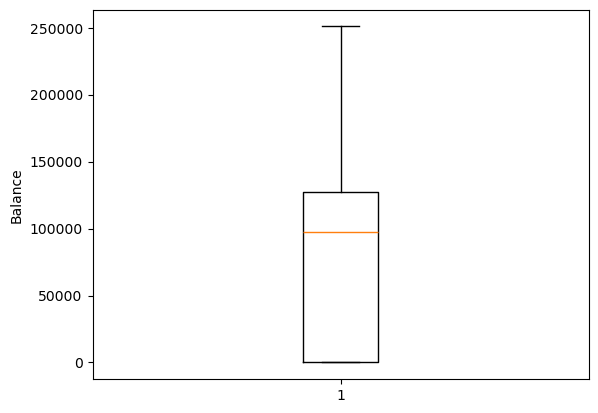

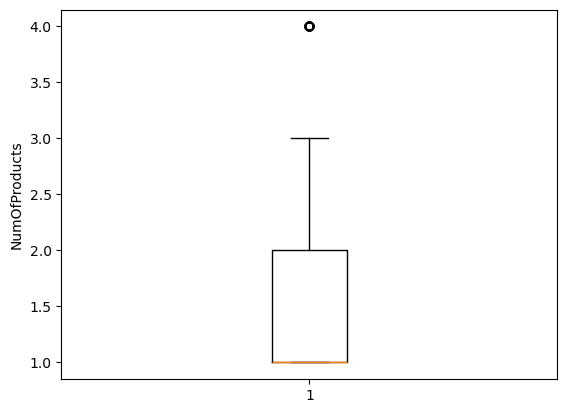

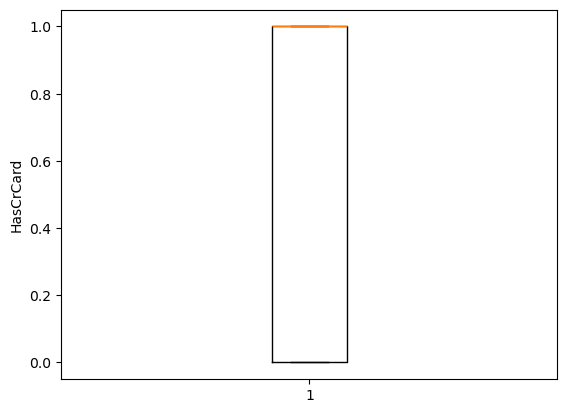

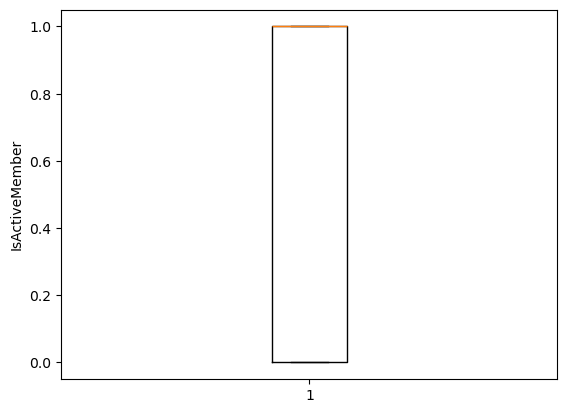

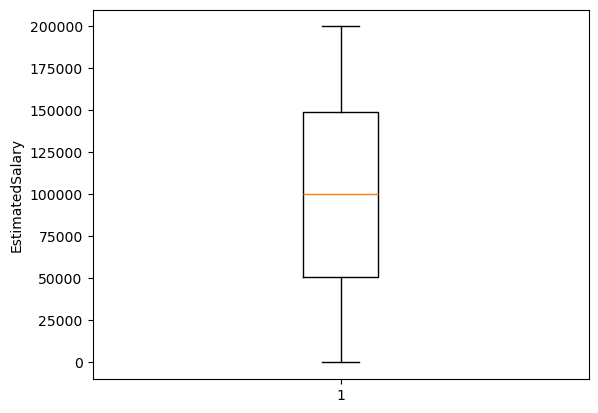

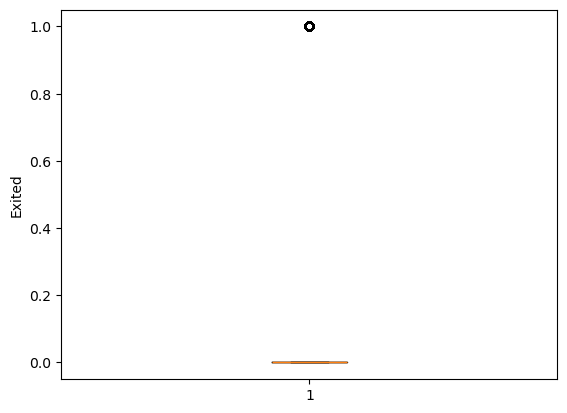

In [12]:
# outliers visualization
for cols in cust_data.columns:
    plt.boxplot( cust_data[cols])
    plt.ylabel(cols)
    plt.show()


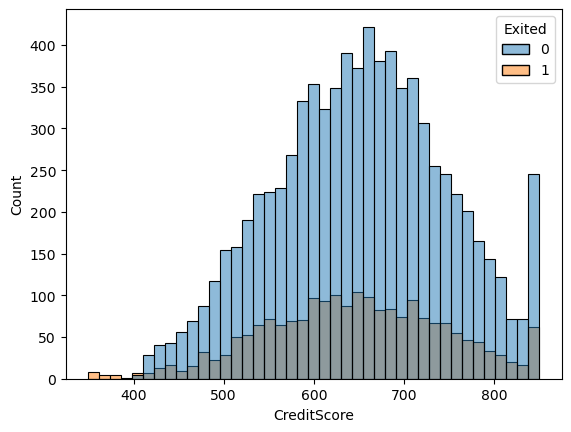

In [13]:
# histplot 
sns.histplot(x = "CreditScore", data = cust_data, hue = "Exited")
plt.show()

In [14]:
# separate dependent and independent variables
X = cust_data.drop("Exited", axis=1)
y= cust_data["Exited"]


In [15]:
X.shape , y.shape

((10000, 10), (10000,))

In [16]:
# Scale the features with standard scaler
std_scaler =  StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled , columns=X.columns)

In [17]:
X_scaled_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,-0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.901886,-0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.901886,1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.306591,-0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [18]:
# split the dataset in train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df , y, test_size=0.20, random_state = 87)
X_train.shape , X_test.shape, y_train.shape , y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [19]:
# Initialize the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_test)
print(" Accuracy Score with RandomForest Algo --" , accuracy_score(y_test, y_predict) * 100)
print(" Classification report \n" , classification_report(y_test, y_predict))
print(" Confusion Matrix \n" , confusion_matrix(y_test , y_predict))

 Accuracy Score with RandomForest Algo -- 85.45
 Classification report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.43      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

 Confusion Matrix 
 [[1535   58]
 [ 233  174]]


In [20]:
# Initialize the Random Forest model
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_predict = model_xgb.predict(X_test)
print(" Accuracy Score with XGBoost Algo --" , accuracy_score(y_test, y_predict) * 100)
print(" Classification report \n" , classification_report(y_test, y_predict))
print(" Confusion Matrix \n" , confusion_matrix(y_test , y_predict))

 Accuracy Score with XGBoost Algo -- 85.2
 Classification report 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.47      0.56       407

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

 Confusion Matrix 
 [[1512   81]
 [ 215  192]]


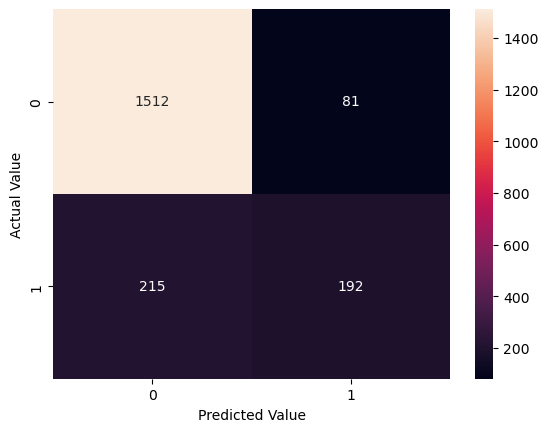

In [21]:
# display the confusion matrix with seaborn for XGBoost model
sns.heatmap(confusion_matrix(y_test , y_predict), annot=True , fmt= 'g' )
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [22]:
# look for importannt feature with Random Forest Classifier
df_imp_feature = pd.DataFrame({"Feature name": X_scaled_df.columns, "Value":model_rf.feature_importances_} )

In [23]:
df_imp_feature.sort_values(by="Value", ascending = False)

,Feature name,Value
3,Age,0.237649
9,EstimatedSalary,0.147794
0,CreditScore,0.140977
6,NumOfProducts,0.140728
5,Balance,0.136898
4,Tenure,0.080339
8,IsActiveMember,0.040787
1,Geography,0.036525
7,HasCrCard,0.019350
2,Gender,0.018955


In [24]:
# look for importannt feature with XGBoost Classifier
df_imp_feature = pd.DataFrame({"Feature name": X_scaled_df.columns, "Value":model_xgb.feature_importances_} )

In [25]:
df_imp_feature.sort_values(by="Value" , ascending = False )

,Feature name,Value
6,NumOfProducts,0.321353
8,IsActiveMember,0.212931
3,Age,0.119733
1,Geography,0.079671
2,Gender,0.058058
5,Balance,0.055634
0,CreditScore,0.040945
9,EstimatedSalary,0.039437
4,Tenure,0.039178
7,HasCrCard,0.033058


In [26]:
# Train the  Random Forest model with k fold cross validition
cross_val_results = cross_val_score(RandomForestClassifier(), X_scaled_df , y , cv=5)
print(" cross_validation score with Random Forest Classifier" , cross_val_results)
print(" Cross  validation mean ", cross_val_results.mean())

 cross_validation score with Random Forest Classifier [0.8585 0.8725 0.859  0.864  0.857 ]
 Cross  validation mean  0.8622


In [27]:
# Train the XGBOOST model with Kfold cross validition
cross_val_results = cross_val_score(XGBClassifier(), X_scaled_df , y , cv=5)
print(" cross_validation score with XGB classifier " , cross_val_results)
print(" Cross  validation mean ", cross_val_results.mean())

 cross_validation score with XGB classifier  [0.8535 0.86   0.854  0.858  0.848 ]
 Cross  validation mean  0.8547
